In [1]:
import numpy as np
import pandas as pd
import os,glob
import matplotlib.pyplot as plt
import seaborn

# Individual csv files

In [2]:
os.chdir('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021')

In [3]:
fils=glob.glob(os.getcwd()+'\\Column Link Files\\*.xlsx')

In [4]:
datlist=[x[-13:-5] for x in fils]

In [5]:
df=pd.DataFrame()
for x in fils:
    temp=pd.read_excel(x)
    temp['Date']= x[-13:-5]
    try:
        temp=temp[['Date','Link','Clicks']]
        df=pd.concat([df,temp])
    except:
        temp['Clicks']=np.nan
        temp=temp[['Date','Link','Clicks']]
        df=pd.concat([df,temp])

In [11]:
df.to_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\alllinks.csv')

# Summary file

In [6]:
summary=pd.read_excel('summary.xlsx')

In [7]:
summary['Date/Time']=pd.to_datetime(summary.iloc[:,0])
summary['Day']=summary['Date/Time'].dt.dayofweek
summary['hour']=summary['Date/Time'].dt.hour
summary['Weekday']=summary['Day'].apply(lambda x: 0 if x<5 else 1)

In [8]:
# parsing dates
summary.head()

,Date/Time,Duration,Sends,Opens,Clicks,Open Rate,Click Rate,Unsubscribes,Word Count,Link Count,Day,hour,Weekday
0,2020-07-20 06:47:17.764,0:00:25.135,87,102,6,1.1724,0.0588,0,450,21,0,6,0
1,2020-07-21 06:33:50.176,0:00:33.135,74,142,22,1.9189,0.1549,0,478,21,1,6,0
2,2020-07-22 06:28:15.271,0:00:33.872,78,123,41,1.5769,0.3333,0,496,21,2,6,0
3,2020-07-23 06:38:34.308,0:00:33.712,82,135,7,1.6463,0.0519,0,496,24,3,6,0
4,2020-07-24 08:19:54.483,0:00:35.835,83,270,15,3.2530,0.0556,0,515,18,4,8,0


In [9]:
summary.to_csv('C:\\Users\\yashg\\Documents\\Projects\\Hackathon_102021\\summary_2.csv')

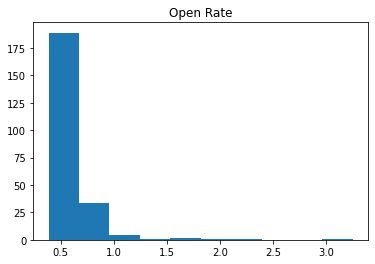

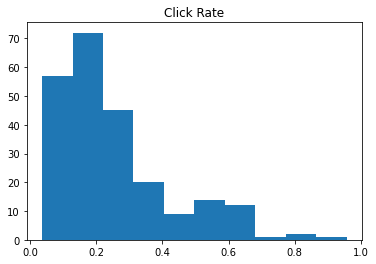

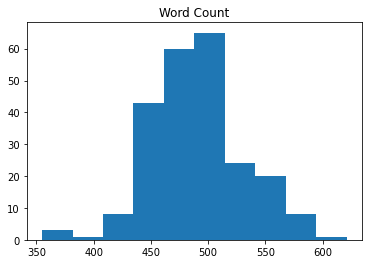

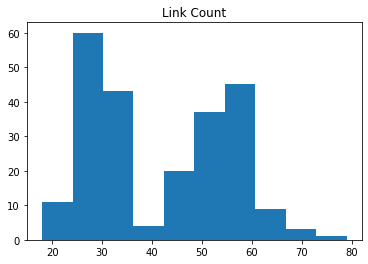

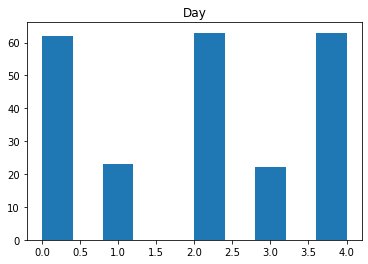

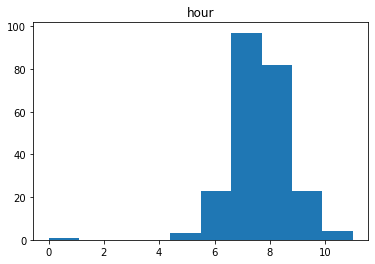

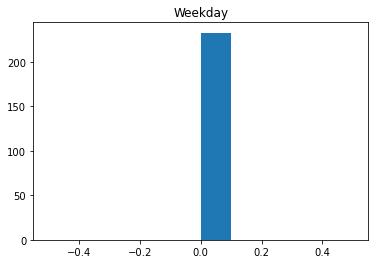

In [10]:
# Preliminary graphs
cols_sign=['Open Rate','Click Rate','Word Count','Link Count','Day','hour','Weekday']
for c in cols_sign:
    plt.hist(summary[c])
    plt.title(c)
    plt.show()